## A step-by-step guide to Data Visualizations in Python

Follow along with [this article](https://medium.com/codex/step-by-step-guide-to-data-visualizations-in-python-b322129a1540).  We will be using [this .xlsx dataset](https://www.kaggle.com/roshansharma/immigration-to-canada-ibm-dataset) from Kaggle on Immigration to Canada from 1980–2013. No need to dowload it, it is already in the git repositroy you forked.<br>

#### We suggest that instead of copy and pasting the code, you type it out.  This will help you become more familiar with the syntex and better understand it.


### Step-1: Importing Packages

In [1]:
#import all librarys and modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import style

style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)


### Step-2 : Importing and Cleaning Data 

In [64]:
#import and clean data, remember path is data/Canada.xlsx
df = pd.read_excel('Data\Canada.xlsx',2) #, skiprows = range(20), skipfooter = 2)
df.drop(['AREA','REG','DEV','Type','Coverage','DevName'], axis=1, inplace=True)
df.rename(columns={'OdName':'country', 'AreaName':'continent', 'RegName':'region'}, inplace=True)
df['total'] = df.sum(axis=1)
df.set_index('country')
df.value_counts('country')
df.rename(index = {'United Kingdom of Great Britain and Northern Ireland':'UK & Ireland'}, inplace = True)
df.columns = df.columns.astype(str)
# Useful for upcoming visualizations
years = list(map(str, range(1980,2013)))

C:\Users\vnmja\AppData\Local\Temp/ipykernel_5648/1459649811.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['total'] = df.sum(axis=1)


In [61]:
df.head(20)

,country,continent,region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
5,Angola,Africa,Middle Africa,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981
7,Argentina,Latin America and the Caribbean,South America,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
8,Armenia,Asia,Western Asia,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
9,Australia,Oceania,Australia and New Zealand,702,639,484,317,317,319,356,...,909,875,1033,1018,1018,933,851,982,1121,23829


### Step-3 : Creating Beautiful Visualizations

#### Line Chart

In [74]:
df.info()
df.set_index('country',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    196 non-null    object
 1   continent  196 non-null    object
 2   region     196 non-null    object
 3   1980       196 non-null    int64 
 4   1981       196 non-null    int64 
 5   1982       196 non-null    int64 
 6   1983       196 non-null    int64 
 7   1984       196 non-null    int64 
 8   1985       196 non-null    int64 
 9   1986       196 non-null    int64 
 10  1987       196 non-null    int64 
 11  1988       196 non-null    int64 
 12  1989       196 non-null    int64 
 13  1990       196 non-null    int64 
 14  1991       196 non-null    int64 
 15  1992       196 non-null    int64 
 16  1993       196 non-null    int64 
 17  1994       196 non-null    int64 
 18  1995       196 non-null    int64 
 19  1996       196 non-null    int64 
 20  1997       196 non-null    int64

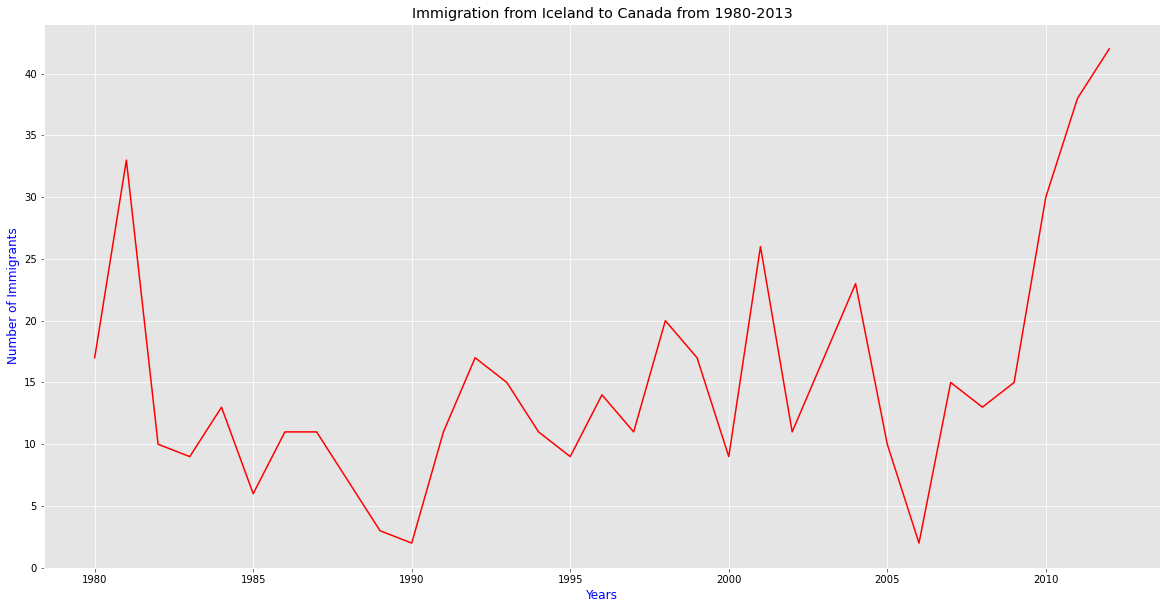

In [87]:
# Single line chart
#df.loc['Iceland', years]
fig1 = df.loc['Iceland', years].plot(kind = 'line', color = 'r')
plt.title('Immigration from Iceland to Canada from 1980-2013',color = 'black')
plt.xlabel('Years',color = 'blue')
plt.ylabel('Number of Immigrants',color = 'blue')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('linechart_single.png')

plt.show()


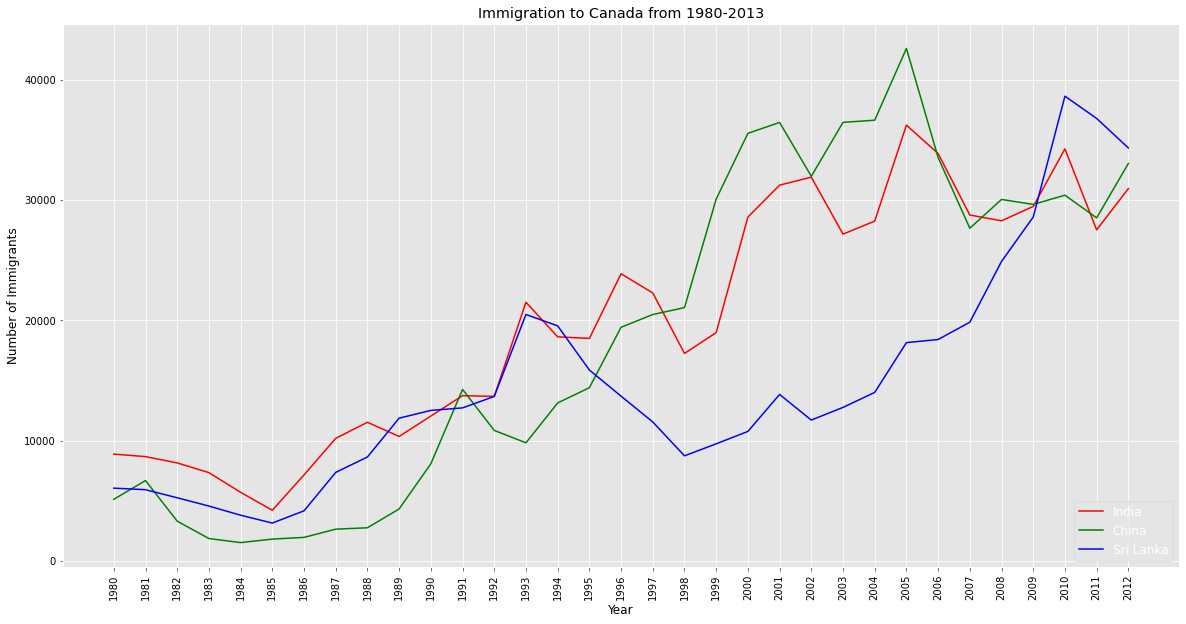

In [106]:
# Multiple Line chart 
plt.style.use('ggplot')
plt.plot(df.loc['India',years], 'r', label = 'India')
#fig2 = plt.plot(df.loc['India',years],  label = 'India')
plt.plot(df.loc['China',years], 'g', label = 'China')
plt.plot(df.loc['Philippines',years], 'b', label = 'Sri Lanka')
plt.legend(loc = 'lower right', fontsize = 12)
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')
plt.title('Immigration to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('linechart_multiple.png')

plt.show()

#### Lets talk about style   

In [92]:
#Shows all avaiable built-in styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


To see a visualization of the aviable style sheets [click here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). 

Syntex to select a specific style is: plt.style.use('style_name') 

Try it out by adding the line of code to the top of the code block above and choose one of the preinstalled styles. Which style is your favorite?<br><br>

What happens when you change the line- plt.legend(loc = 'upper left', fontsize = 12) to plt.legend(loc = 'lower right', fontsize = 12)? <br><br><br><br>



Experiment changing other lines of the code and see how the graph changes. Add any notes or observations here. Going forward feel free to experiment with each graph type<br><br><br><br><br><br>

#### Install mplcyberpunk
Open a terminal window and at at the prompt type:

python -V

If its python 3.something, copy and paste: pip install mplcyberpunk
If its python 2.something, copy and paste: pip3 install mplcyberpunk


For more info on mplcyberpunk click [here.](https://github.com/dhaitz/mplcyberpunk)

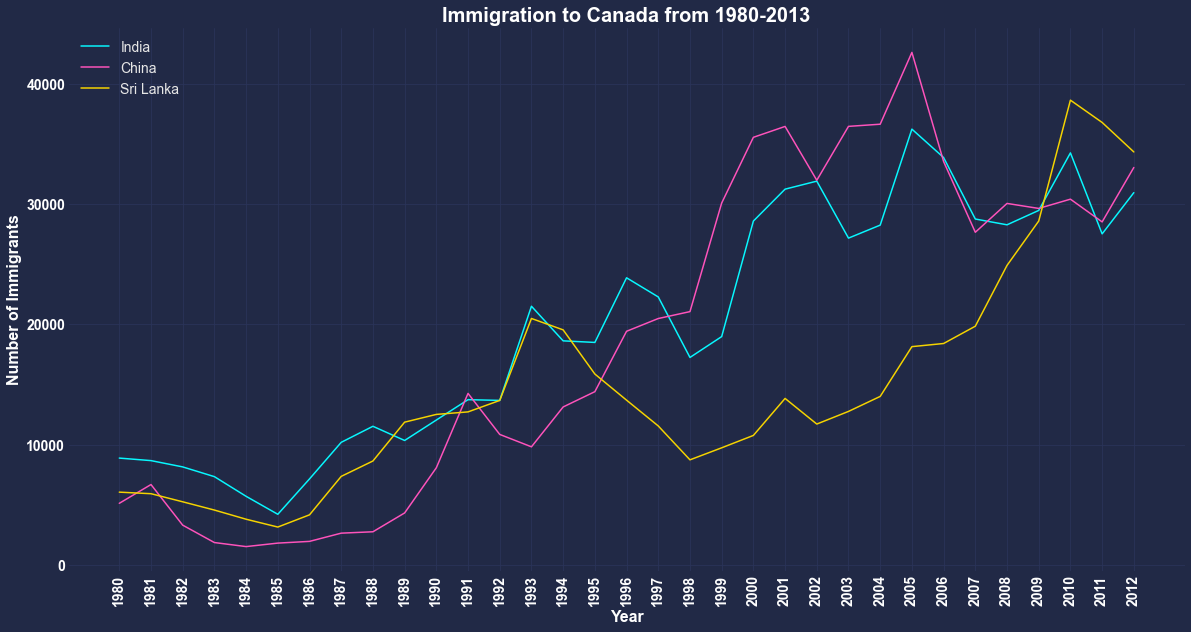

In [107]:
# Cyberpunk Multiple Line Chart
import mplcyberpunk
style.use('cyberpunk')

plt.plot(df.loc['India',years], label = 'India')
plt.plot(df.loc['China',years], label = 'China')
plt.plot(df.loc['Philippines',years], label = 'Sri Lanka')
plt.legend(loc = 'upper left', fontsize = 14)
plt.xticks(rotation = 90, color = 'white', fontsize = 14, fontweight = 'bold')
plt.yticks(color = 'white', fontsize = 14, fontweight = 'bold')
plt.title('Immigration to Canada from 1980-2013',color = 'white', fontsize = 20, fontweight = 'bold')
plt.xlabel('Year',color = 'white', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Immigrants',color = 'white',fontsize = 16, fontweight = 'bold')
plt.savefig('cyber_line.png')

plt.show()


#### Bar Chart

       total
1980  143137
1981  128641
1982  121175
1983   89185
1984   88272
1985   84346
1986   99351
1987  152075
1988  161585
1989  191550
1990  216451
1991  232802
1992  254787
1993  256638
1994  224382
1995  212864
1996  226071
1997  216036
1998  174195
1999  189950
2000  227455
2001  250636
2002  229049
2003  221349
2004  235822
2005  262242
2006  251640
2007  236753
2008  247244
2009  252170
2010  280687
2011  248748
2012  257903


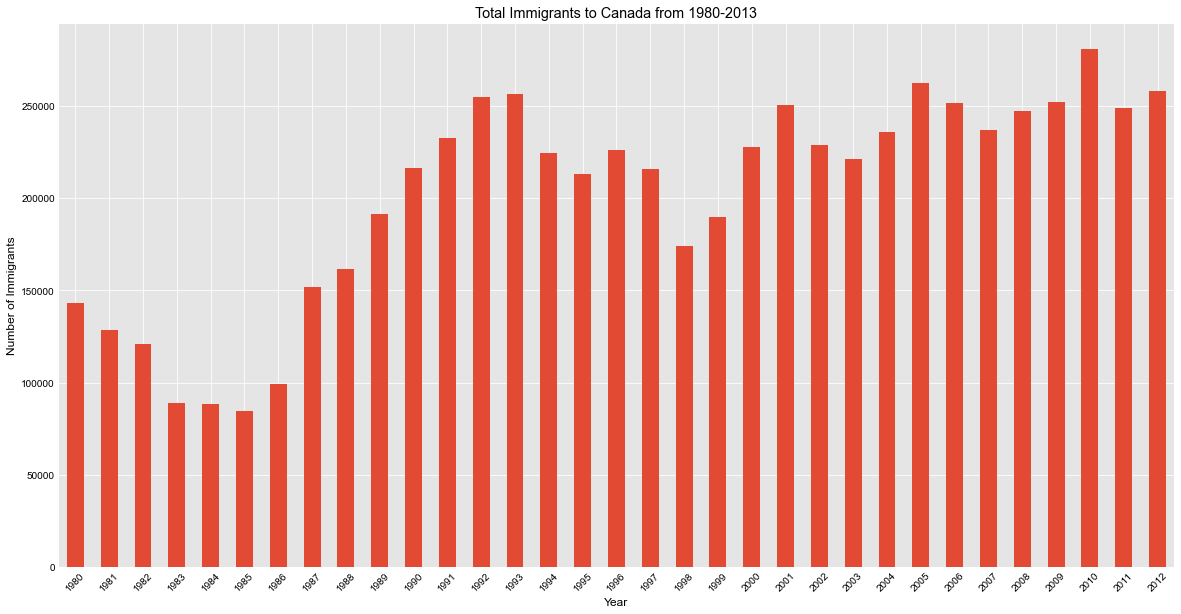

In [151]:
# Vertical bar chart
# Do not change the style back to ggplot 
# delete the style.use('ggplot') line of code
# Vertical

df_tot = pd.DataFrame(df.loc[:,years].sum())
df_tot.rename(columns = {0:'total'}, inplace = True)
print(df_tot)
df_tot.plot(kind='bar',legend=False)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(rotation = 45, color='black')
plt.yticks(color='black')
plt.xlabel('Year',color='black')
plt.ylabel('Number of Immigrants',color='black')
plt.savefig('bar_vertical.png')

plt.show()


Notice that style is still set to cyberpunk.  How do we fix it so we can see the labels?<br> <br>

Answer: change the color = 'black' to 'white'

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

                                                     total
country                                                   
Republic of Korea                                   142581
Sri Lanka                                           148358
Iran (Islamic Republic of)                          175923
United States of America                            241122
Pakistan                                            241600
Philippines                                         511391
Unknown                                             515059
United Kingdom of Great Britain and Northern Ir...  551500
China                                               659962
India                                               691904


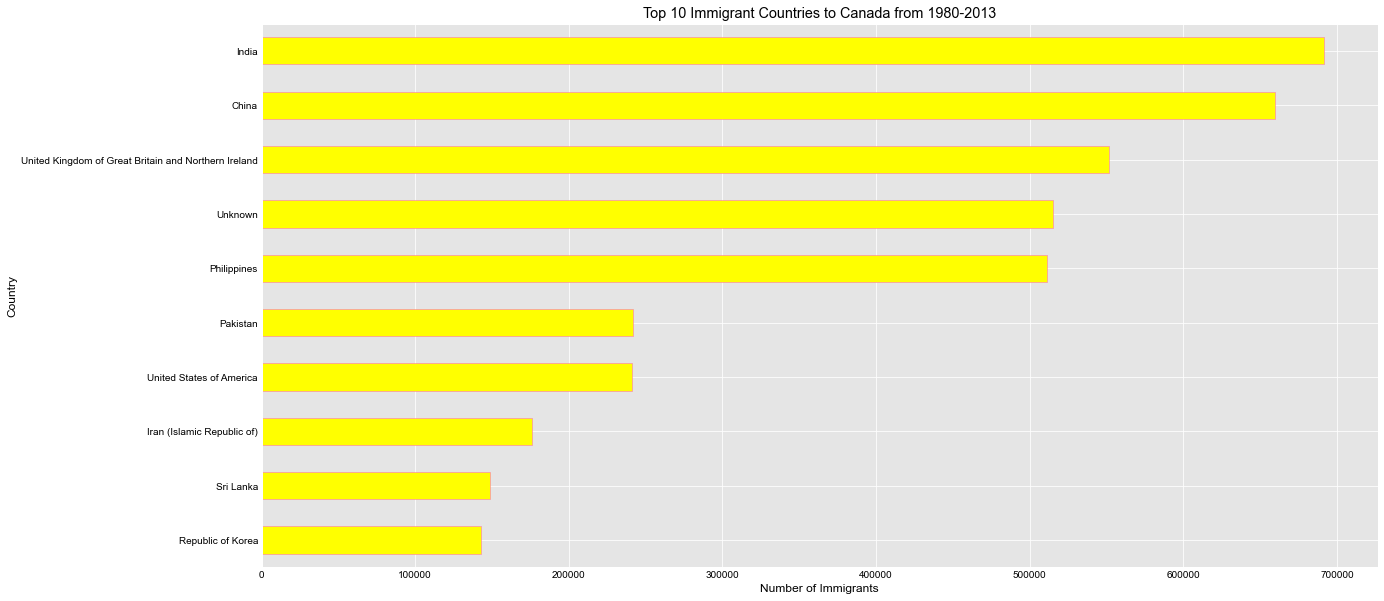

In [147]:
# Horizontal bar chart
#change style back to ggplt
style.use('ggplot')
df_top10 = pd.DataFrame(df.nlargest(10,'total')['total'].sort_values(ascending = True))
print(df_top10)
df_top10.plot.barh(legend = False, color = 'yellow', edgecolor = 'hotpink')
plt.title('Top 10 Immigrant Countries to Canada from 1980-2013',color = 'black')
plt.xlabel('Number of Immigrants',color = 'black')
plt.ylabel('Country',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('bar_horizontal.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

country  India  China  Philippines  Pakistan
1980      8880   5123         6051       978
1990     12041   8076        12509      2470
2000     28572  35529        10763     15400
2010     34235  30391        38617      6811
2013     33087  34129        29544     12603


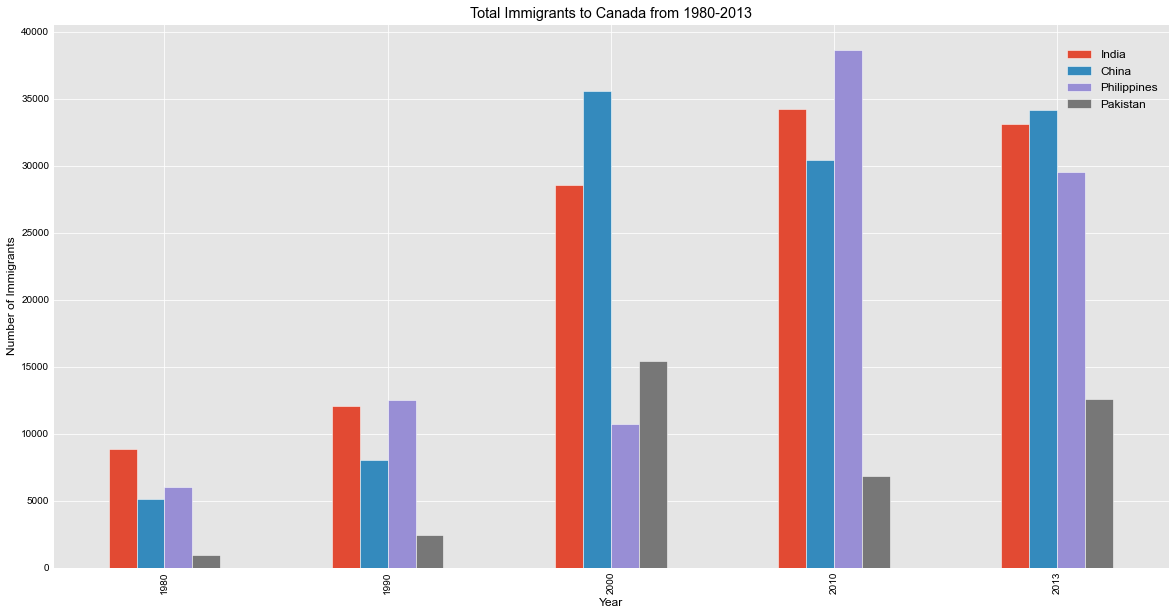

In [150]:
# Grouped bar chart

year_int10 = list(map(str, (1980,1990,2000,2010, 2013)))
df_group = pd.DataFrame(df.loc[['India','China','Philippines','Pakistan'],year_int10].T)
print(df_group)
df_group.plot.bar(edgecolor = 'white')
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', labelcolor='black', fontsize = 12)
plt.savefig('bar_grouped.png')

plt.show()

Notice how the labels in the legend have disapeared?  We can fix this by adding labelcolor='k' to plt.legend<br>
<br>plt.legend(title = 'Country', fontsize = 12, labelcolor='black')



Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Area Chart

Text(0, 0.5, 'Number of Immigrants')

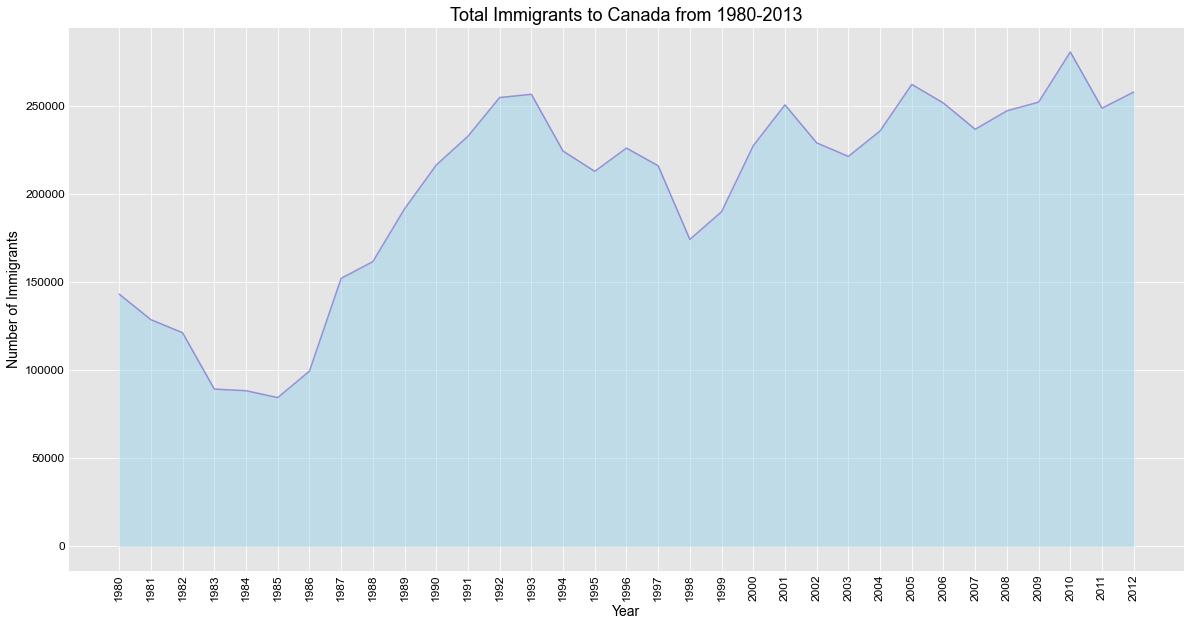

In [158]:
# Area Chart
plt.fill_between(df_tot.index, df_tot['total'], color="skyblue", alpha=0.4)
plt.plot(df_tot.index, df_tot['total'], color = 'Slateblue', alpha = 0.6)
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 18, color = 'black')
plt.yticks(fontsize = 12, color = 'black')
plt.xticks(fontsize = 12, rotation = 90, color = 'black')
plt.xlabel('Year', fontsize = 14, color = 'black')
plt.ylabel('Number of Immigrants', fontsize = 14, color = 'black')

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

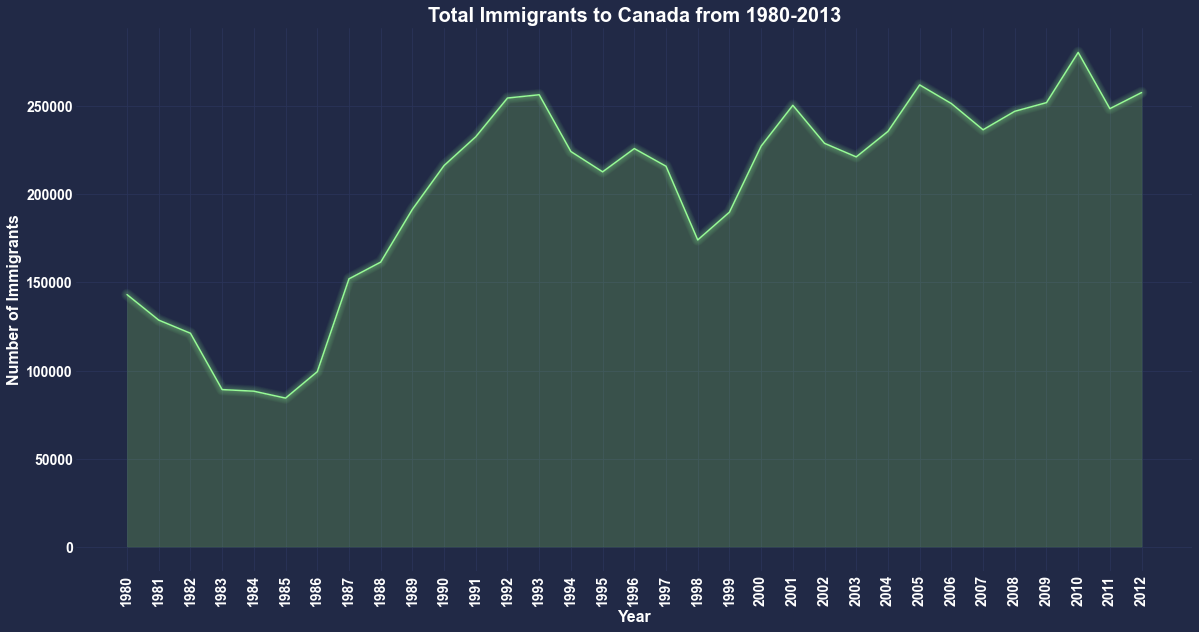

In [163]:
# cyberpunk simple area chart
import mplcyberpunk

style.use('cyberpunk')

plt.fill_between(df_tot.index, df_tot['total'], color = 'greenyellow', alpha = 0.1)
plt.plot(df_tot.index, df_tot['total'], color = 'palegreen', alpha = 1)
mplcyberpunk.add_glow_effects()
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 20,fontweight = 'bold', color = 'white')
plt.yticks(fontsize = 14, color = 'white',fontweight = 'bold')
plt.xticks(fontsize = 14, rotation = 90, color = 'white',fontweight = 'bold')
plt.xlabel('Year', fontsize = 16, color = 'white',fontweight = 'bold')
plt.ylabel('Number of Immigrants', fontsize = 16, color = 'white',fontweight = 'bold')
plt.savefig('cyber_area_simple.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

['India', 'China']
country  India  China
1980      8880   5123
1981      8670   6682
1982      8147   3308
1983      7338   1863
1984      5704   1527
1985      4211   1816
1986      7150   1960
1987     10189   2643
1988     11522   2758
1989     10343   4323
1990     12041   8076
1991     13734  14255
1992     13673  10846
1993     21496   9817
1994     18620  13128
1995     18489  14398
1996     23859  19415
1997     22268  20475
1998     17241  21049
1999     18974  30069
2000     28572  35529
2001     31223  36434
2002     31889  31961
2003     27155  36439
2004     28235  36619
2005     36210  42584
2006     33848  33518
2007     28742  27642
2008     28261  30037
2009     29456  29622
2010     34235  30391
2011     27509  28502
2012     30933  33024


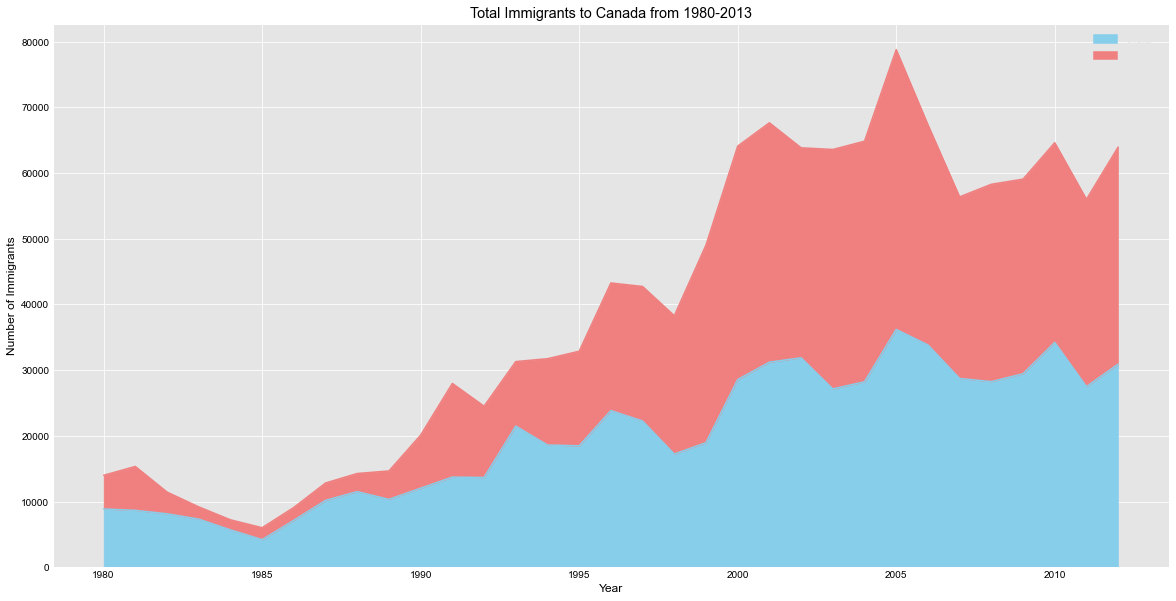

In [173]:
# stacked area chart
style.use('ggplot')
color = ['skyblue','lightcoral']
top2_list = df.nlargest(2, 'total').index.tolist()
print(top2_list)
df_top2 = pd.DataFrame(df.loc[top2_list, years].T)
print(df_top2)
df_top2.plot(kind = 'area', stacked = True, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.legend(fontsize = 12)
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_stacked.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

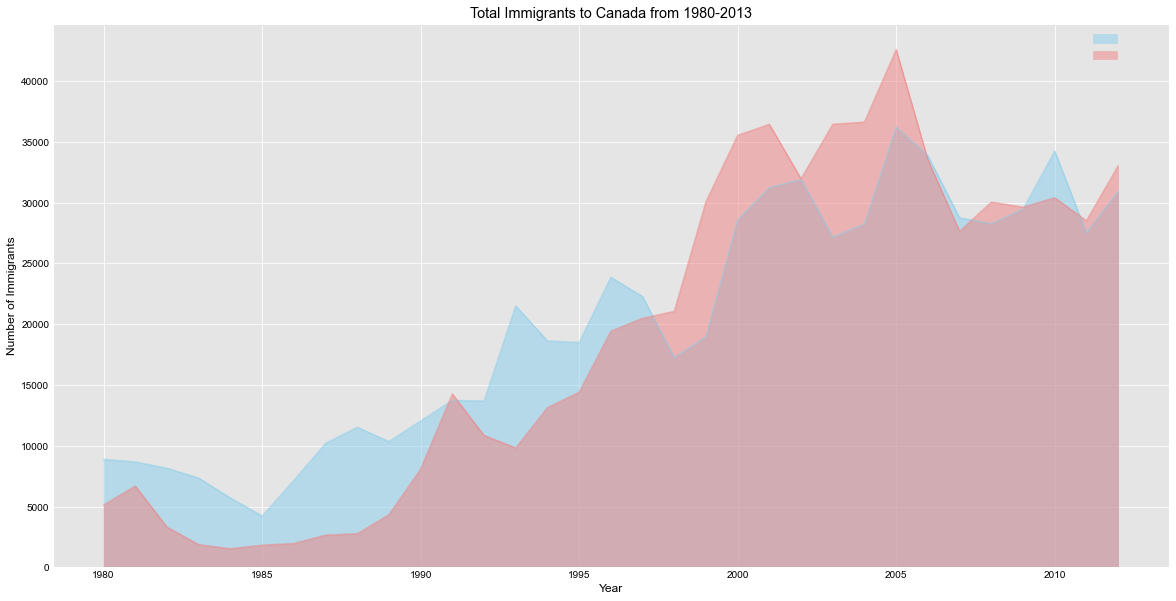

In [174]:
# unstacked area chart
df_top2.plot(kind = 'area', stacked = False, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(fontsize = 12)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_unstacked.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Box Plot

country         India         China      Pakistan   Philippines
count       33.000000     33.000000     33.000000     33.000000
mean     19964.151515  18964.636364   6939.303030  14601.424242
std       9902.183636  13523.131580   5307.390092   9296.796081
min       4211.000000   1527.000000    514.000000   3150.000000
25%      10343.000000   5123.000000   1334.000000   8639.000000
50%      18974.000000  19415.000000   6811.000000  12718.000000
75%      28572.000000  30391.000000  11227.000000  18400.000000
max      36210.000000  42584.000000  16708.000000  38617.000000


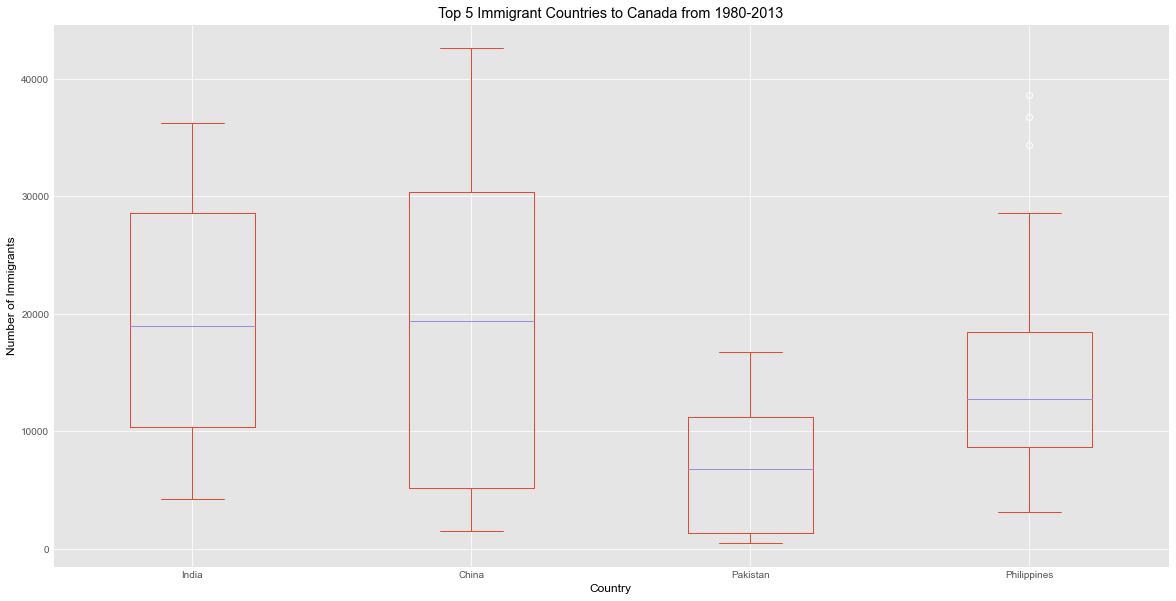

In [181]:
# Vertical Box Plot
df_box = pd.DataFrame(df.loc[['India','China','Pakistan','Philippines'], years].T)
print(df_box.describe())
df_box.plot(kind = 'box')
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.xlabel('Country', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('box_vertical.png')

plt.show()



Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

In [14]:
# horizontal box plot


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Scatter Plot

With the newist version of Seaborn we have to specify x and y.

example: sb.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df_iris)

In [15]:
#scatter plot comparing sepal length to sepal width


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Histogram

With the newist version of Seaborn they have deprecated distplot. Replace distplot with histplot and add kde = True

example:
sb.histplot(df_iris['sepal_length'], color = 'Red', label = 'Sepal Length', kde = True)

In [16]:
#Histogram side by side, with kde


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Bubble Plot

In [17]:
# Bubble Plot


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Pie Chart

Skip this one as the code throws an error. 

df_pie = pd.DataFrame(df.groupby('continent')['total'].sum().T)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode = [0,0.1,0,0,0.1,0.1]

plt.pie(df_pie, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode, pctdistance = 1.12, shadow = True)
plt.title('Continent-Wise Immigrants Distribution', color = 'black', y = 1.1, fontsize = 18)
plt.legend(df_pie.index, loc = 'upper left', fontsize = 12)
plt.axis('equal')
plt.savefig('pie.png')

plt.show()

#### Doughnut Chart

In [18]:
# Doughnut Chart


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Regression Plot

In [19]:
# Strong trend


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

In [20]:
# Weak trend


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Word Cloud

You might need to pip install wordcloud and pip install Pywaffle.  Follow the instruction from when you installed cyperpunk earlier.

Make sure to add the txt files from [here](https://github.com/codinglikeagirl42/DataVisualizationPython) to your data folder and remember the path is data/filename.txt. Try creating your own txt file to visualize.

In [21]:
# word cloud
from wordcloud import WordCloud, STOPWORDS


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Lollipop Chart

In [22]:
# Lollipop chart


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>